In [1]:
# Along-fjord structure plot
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import gsw
import cmocean

In [2]:
def State_t(case_id, t):

    file0 = xr.open_dataset(datapath+'/state_' + str(format(case_id,'03d')) + '.nc')

    # removed duplicated data caused by model restart
    file = file0.isel(T=~file0.get_index("T").duplicated())
    state = file.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    
    X = state.X.data 
    x_dist = X / 1000
    depth = state.Z.data
    
    # Potential temperature
    pt = state.Temp.data[t,:,:,:].mean(1)    
    # Salinity
    s = state.S.data[t,:,:,:].mean(1)
    # Pressure
    pres = gsw.p_from_z(depth, 55)
    p = np.tile(pres,[len(x_dist),1]).T
    rho = gsw.rho(s, pt, p) # Density
    
    s_ini = state.S.data[0,:,:,:].mean(1)
    mask = (s_ini == 0) # Exclude data covered by the sill
    rho[mask] = np.nan
    pt[mask] = np.nan
    
    
    
    
    
    # Along-fjord velocity
    uzx = (state.U.data[:, :, :, 1:].mean(2) + state.U.data[:, :, :, :-1].mean(2)) / 2
    u = uzx[t,:,:]
    
    # Vetical velocity
    W0 = state.W.data
    bt = np.zeros((W0.shape[0],1,W0.shape[2],W0.shape[3])) # Add vertical velocity (0 m/s) at the bottom
    W = np.concatenate((W0, bt), axis=1)
    wzx = (W[:,1:,:,:].mean(2) + W[:,:-1,:,:].mean(2)) / 2
    w = wzx[t,:,:]
    
    pt0 = file.Temp.data.mean(2)[1,:,:260]
    mask = (pt0 == 0)
    u[mask] = np.nan
    w[mask] = np.nan   
        
    return (x_dist, depth, pt, rho, u, w)

In [3]:
datapath = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs/'
case = np.array([1,2,3,4])

t = -1


x1, z1, temp1, rho1, u1, w1 = State_t(case[0], t) 
x2, z2, temp2, rho2, u2, w2 = State_t(case[1], t) 
x3, z3, temp3, rho3, u3, w3 = State_t(case[2], t) 
x4, z4, temp4, rho4, u4, w4 = State_t(case[3], t) 


In [4]:
temp1.shape, rho1.shape, u1.shape, w1.shape

((90, 260), (90, 260), (90, 260), (90, 260))

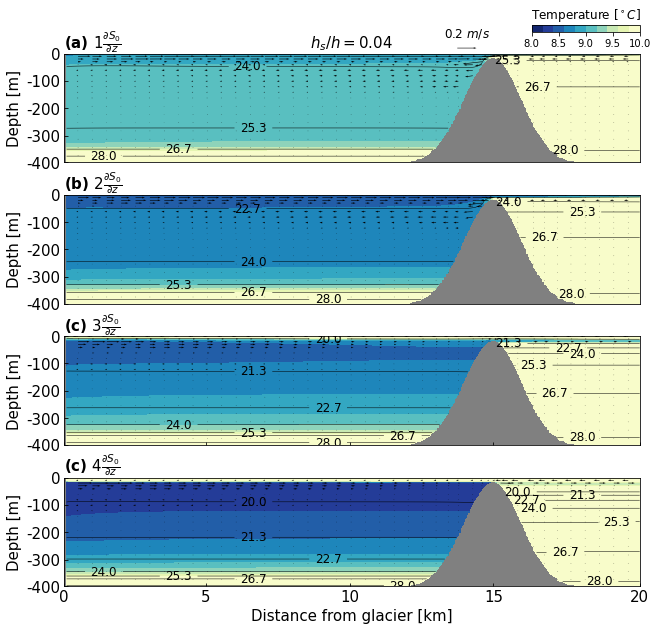

In [5]:
# Make plot for three different sill depths (New Runs)
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex=True, figsize=(10,10))

cm = np.linspace(8,10,11) # Contour range
#cmap = cmocean.cm.thermal
cmap = 'YlGnBu_r'

x_dist = x1
depth = z1
im1 = ax1.contourf(x_dist, depth, temp1, cm, cmap=cmap)
#ax1.axvline(x=x_dist[120], color='g',lw=2)
ax1.set_facecolor('grey')
ax1.tick_params(direction='in', labelsize=15)


cbaxes = fig1.add_axes([0.75, 0.9, 0.15, 0.01])
cbar = fig1.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([8, 8.5, 9, 9.5, 10])
cbar.ax.set_title(r'Temperature [$^\circ C$]', size=12)

crho = np.linspace(1020,1028,7) - 1000 # Contour range for density
CS1 = ax1.contour(x_dist,depth,rho1-1000,crho, colors='k', linewidths=.5)
plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)
ax1.xaxis.set_visible(False)
ax1.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax1.set_yticklabels(["0","-100","-200","-300","-400"])
ax1.set_ylabel('Depth [m]', size=15)
ax1.set_title(r'(a) $1\frac{\partial S_0}{\partial z}$', loc='left', size=15, weight='bold')
ax1.set_title(r'$h_s/h=0.04$', loc='center', size=15, weight='bold')




im2 = ax2.contourf(x_dist, depth, temp2, cm, cmap=cmap)
#ax1.axvline(x=x_dist[120], color='g',lw=2)
ax2.set_facecolor('grey')
ax2.tick_params(direction='in', labelsize=15)

CS2 = ax2.contour(x_dist,depth,rho2-1000,crho, colors='k', linewidths=.5)
plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)
ax2.xaxis.set_visible(False)
ax2.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax2.set_yticklabels(["0","-100","-200","-300","-400"])
ax2.set_ylabel('Depth [m]', size=15)
ax2.set_title(r'(b) $2\frac{\partial S_0}{\partial z}$', loc='left', size=15, weight='bold')




im3 = ax3.contourf(x_dist, depth, temp3, cm, cmap=cmap)
#ax1.axvline(x=x_dist[120], color='g',lw=2)
ax3.set_facecolor('grey')
ax3.tick_params(direction='in', labelsize=15)

CS3 = ax3.contour(x_dist,depth,rho3-1000,crho, colors='k', linewidths=.5)
plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)
ax3.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax3.set_yticklabels(["0","-100","-200","-300","-400"])
ax3.set_ylabel('Depth [m]', size=15)
ax3.set_title(r'(c) $3\frac{\partial S_0}{\partial z}$', loc='left', size=15, weight='bold')




im4 = ax4.contourf(x_dist, depth, temp4, cm, cmap=cmap)
ax4.set_facecolor('grey')
ax4.tick_params(direction='in', labelsize=15)

CS4 = ax4.contour(x_dist,depth,rho4-1000,crho, colors='k', linewidths=.5)
plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)
ax4.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax4.set_yticklabels(["0","-100","-200","-300","-400"])
ax4.set_ylabel('Depth [m]', size=15)
ax4.set_title(r'(c) $4\frac{\partial S_0}{\partial z}$', loc='left', size=15, weight='bold')
ax4.set_xticks([x_dist[0], 5, 10, 15, x_dist[-1]])
ax4.set_xticklabels(["0","5","10","15","20"])
ax4.set_xlabel('Distance from glacier [km]', size=15)



sl, sr = 140, 220 # quiver over sill range

u1_sill = u1[:,sl:sr]
w1_sill = w1[:,sl:sr]
x1_sill = x1[sl:sr]

n = 5
Q_1s = ax1.quiver(x1_sill[::10],z1[::n],u1_sill[::n,::10], w1_sill[::n,::10],scale=6, width=0.001, color='k')
u1[:,sl:sr] = 'nan'
w1[:,sl:sr] = 'nan'
Q_1 = ax1.quiver(x1[::n],z1[::n],u1[::n,::n], w1[::n,::n],scale=6, width=0.001, color='k')
ax1.quiverkey(Q_1, 0.7, 1.05, 0.2, r'0.2 $m/s$', fontproperties={'size':12}, coordinates='axes')


u2_sill = u2[:,sl:sr]
w2_sill = w2[:,sl:sr]
x2_sill = x2[sl:sr]
Q_2s = ax2.quiver(x2_sill[::10],z2[::n],u2_sill[::n,::10], w2_sill[::n,::10],scale=6, width=0.001, color='k')
u2[:,sl:sr] = 'nan'
w2[:,sl:sr] = 'nan'
Q_2 = ax2.quiver(x2[::n],z2[::n],u2[::n,::n], w2[::n,::n],scale=6, width=0.001, color='k')


u3_sill = u3[:,sl:sr]
w3_sill = w3[:,sl:sr]
x3_sill = x3[sl:sr]
Q_3s = ax3.quiver(x3_sill[::10],z3[::n],u3_sill[::n,::10], w3_sill[::n,::10],scale=6, width=0.001, color='k')

u3[:,sl:sr] = 'nan'
w3[:,sl:sr] = 'nan'
Q_3 = ax3.quiver(x3[::n],z3[::n],u3[::n,::n], w3[::n,::n],scale=6, width=0.001, color='k')


u4_sill = u4[:,sl:sr]
w4_sill = w4[:,sl:sr]
x4_sill = x4[sl:sr]
Q_3s = ax4.quiver(x4_sill[::10],z4[::n],u4_sill[::n,::10], w4_sill[::n,::10],scale=6, width=0.001, color='k')

u4[:,sl:sr] = 'nan'
w4[:,sl:sr] = 'nan'
Q_4 = ax4.quiver(x4[::n],z4[::n],u4[::n,::n], w4[::n,::n],scale=6, width=0.001, color='k')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.13, 
                    right=0.9, 
                    top=0.87, 
                    wspace=0.1, 
                    hspace=0.3)
plt.show()

In [6]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig1.savefig(fig_path + '/along-fjordTemp_Sz.png', dpi=300, bbox_inches='tight') 